In [1]:
# limporting required liberaries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
# loading the data
df = pd.read_csv('Iris.csv')

In [3]:
# quick view of data

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# checking for any null value

df.isna().any()[lambda x:x]

Series([], dtype: bool)

In [5]:
# encoding the labels or species 

df['Species'] = LabelEncoder.fit_transform(df['Species'],df['Species'])

In [6]:
# dropping the id column

df = df.drop(['Id'],axis=1)

In [7]:
# final quick view of data
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


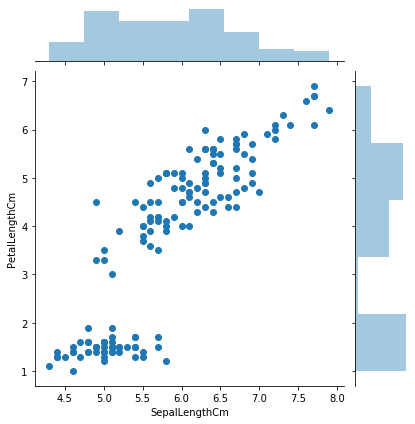

In [8]:
# comparing sepal and peta length

sns.jointplot(x='SepalLengthCm', y='PetalLengthCm',data=df)

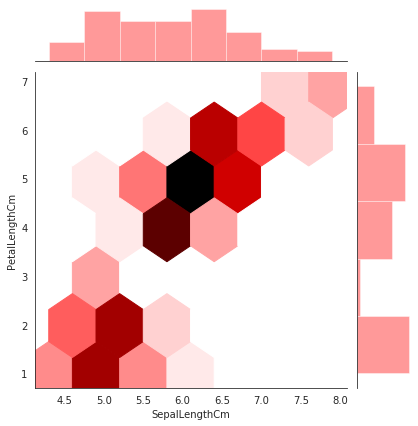

In [9]:
x, y = df.SepalLengthCm,df.PetalLengthCm
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="r");

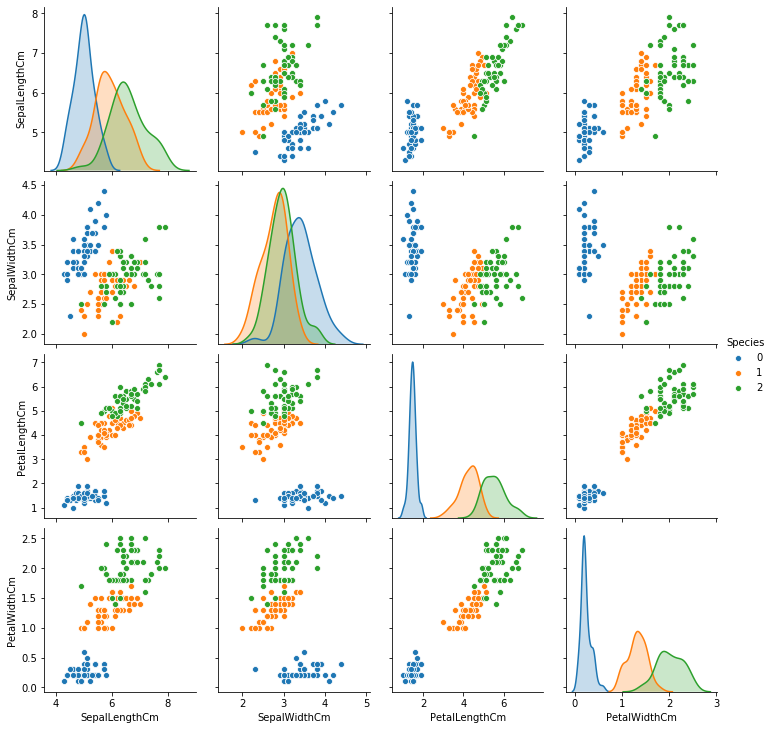

In [10]:
# ploting pairwise plot of the data

sns.pairplot(df,hue ='Species')

In [11]:
# assigning the target

target = np.array(df['Species'])
target = target.reshape(-1,1)

In [12]:
# one hot encoding of target

target = to_categorical(target)

In [13]:
# assigning our features

x = np.array(df.drop(['Species'],axis=1))
x = x/np.amax(x,axis=0)

In [14]:
# splitting the data

x_train ,x_test ,y_train,y_test = train_test_split(x,target,test_size=0.2,shuffle= True)

In [15]:
# defining our classifier

clf = RandomForestClassifier(n_estimators=100,max_depth=10)

In [16]:
# fitting the classifier on the training data

clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
# how good it fits to our training data

clf.score(x_train,y_train)

1.0

In [18]:
# how good it performans on the test data

clf.score(x_test,y_test)

1.0

In [19]:
# predict species for test data

ypred = clf.predict(x_test)

In [20]:
y_pred = np.argmax(ypred,axis=1)

In [21]:
y_pred.shape

(30,)

In [22]:
labels = np.argmax(y_test,axis=1)

In [23]:
# creating a confusion matrix

cm=confusion_matrix(labels,y_pred)
cm = cm/cm.sum(axis=1)

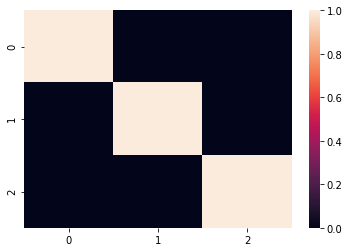

In [24]:
# ploting the matrix in form of heat map

sns.heatmap(cm)